In [1]:
import numpy as np
from bs4 import BeautifulSoup
import pandas as pd
import random
import matplotlib.pyplot as plt
import matplotlib as mpl
plt.rcParams['font.sans-serif']=['simhei'] #显示中文
plt.rcParams['axes.unicode_minus']=False   #用来正常显示负号
%matplotlib inline

In [2]:
infile = 'lego\lego8288.html'
HTML_DOC = open(infile,encoding = 'utf-8').read()

In [3]:
soup = BeautifulSoup(HTML_DOC,'lxml')
i=1
currentRow = soup.find_all('table', r = f'{i}')
currentRow

[<table class="li" r="1"><tr><td class="pic p140 lt"><a class="img" href="#"><img alt="Item image" class="img" src="http://thumbs3.ebaystatic.com/m/mJFeBM5zAghBQuvICGgZcaQ/140.jpg"/></a></td><td class="dtl"><div class="ttl"><a class="vip" href="http://cgi.ebay.com/Lego-Technic-8288-Crawler-crane-/300514626390?pt=LH_DefaultDomain_0&amp;hash=item45f8114b56">Lego Technic 8288 Crawler crane</a></div><div class="dyn dynS"><div class="s1 empty"><div class="mWSpc"></div> </div></div><div class="anchors"><div class="g-nav group"><a href="http://shop.ebay.com/sis.html?_kw=Lego+Technic+8288+Crawler+crane&amp;ssPageName=SRCH%3ACMPL%3AVS&amp;_fis=2&amp;_id=300514626390&amp;_isid=0&amp;_sibeleafcat=156604">View similar active items</a><span class="vbar g-nav"> | </span><a href="http://cgi5.ebay.com/ws/eBayISAPI.dll?SellLikeItem&amp;item=300514626390&amp;ssPageName=STRK:MEWN:LILTX">Sell one like this</a></div></div></td><td class="trs"><img alt="Get fast shipping and excellent service when you buy f

In [4]:
currentRow[0].find_all('a')[1].text

'Lego Technic 8288 Crawler crane'

In [5]:
title = currentRow[0].find_all('a')[1].text

In [6]:
title

'Lego Technic 8288 Crawler crane'

In [7]:
lwrTitle = title.lower()

In [8]:
lwrTitle

'lego technic 8288 crawler crane'

In [9]:
lwrTitle.find('lego')

0

In [10]:
currentRow[0].find_all('td')[3].find_all('span')

[<span class="sold">Sold</span>]

In [11]:
currentRow[0].find_all('td')[4]

<td class="prc bidsold g-b">$85.00</td>

In [12]:
soldPrice = currentRow[0].find_all('td')[4].text

In [13]:
soldPrice.replace('$','')

'85.00'

In [14]:
def scrapePage(data, infile, yr, numPce, origPrc):
    HTML_DOC = open(infile,encoding = 'utf-8').read()
    soup = BeautifulSoup(HTML_DOC,'lxml')
    i=1
    #根据HTML页面结构进行解析
    currentRow = soup.find_all('table', r = f'{i}')
    while(len(currentRow) != 0):
        currentRow = soup.find_all('table', r = f'{i}')
        title = currentRow[0].find_all('a')[1].text
        lwrTitle = title.lower()
        #查找是否有全新标签
        if (lwrTitle.find('new') > -1):
            newFlag = 1
        else:newFlag = 0
        #查找是否已经标志出售，我们只收集已出售的数据
        soldbutt = currentRow[0].find_all('td')[3].find_all('span')
        if len(soldbutt) == 0:
            print(f"商品 #{i} 没有出售")
        else:
            #解析页面获取当前价格
            soldPrice = currentRow[0].find_all('td')[4]
            priceStr = soldPrice.text
            priceStr = priceStr.replace('$','')
            priceStr = priceStr.replace(',','')
            if len(soldPrice) > 1:
                priceStr = priceStr.replace('Free shipping', '')
            sellingPrice = float(priceStr)
            #去掉不完整的套装价格
            if  sellingPrice > origPrc * 0.5:
                data.append([yr, numPce, newFlag, origPrc,sellingPrice])
        i+=1
        currentRow = soup.find_all('table', r = f'{i}')

In [15]:
def setDataCollect(data):
    scrapePage(data, 'lego/lego8288.html', 2006, 800, 49.99)    
    scrapePage(data, 'lego/lego10030.html', 2002, 3096, 269.99) 
    scrapePage(data, 'lego/lego10179.html', 2007, 5195, 499.99) 
    scrapePage(data, 'lego/lego10181.html', 2007, 3428, 199.99) 
    scrapePage(data, 'lego/lego10189.html', 2008, 5922, 299.99) 
    scrapePage(data, 'lego/lego10196.html', 2009, 3263, 249.99) 

In [16]:
data=[]
setDataCollect(data)

商品 #4 没有出售
商品 #11 没有出售
商品 #4 没有出售
商品 #16 没有出售
商品 #18 没有出售
商品 #21 没有出售
商品 #22 没有出售
商品 #2 没有出售
商品 #6 没有出售
商品 #7 没有出售
商品 #9 没有出售
商品 #16 没有出售
商品 #5 没有出售
商品 #6 没有出售
商品 #10 没有出售
商品 #12 没有出售


In [17]:
df = pd.DataFrame(data)

In [18]:
df.head()

,0,1,2,3,4
0,2006,800,0,49.99,85.00
1,2006,800,0,49.99,102.50
2,2006,800,0,49.99,77.00
3,2006,800,0,49.99,162.50
4,2002,3096,0,269.99,699.99


In [19]:
df.columns = ['出品年份','部件数目','全新否','原价','二手售价']
df.head()

,出品年份,部件数目,全新否,原价,二手售价
0,2006,800,0,49.99,85.00
1,2006,800,0,49.99,102.50
2,2006,800,0,49.99,77.00
3,2006,800,0,49.99,162.50
4,2002,3096,0,269.99,699.99


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   出品年份    63 non-null     int64  
 1   部件数目    63 non-null     int64  
 2   全新否     63 non-null     int64  
 3   原价      63 non-null     float64
 4   二手售价    63 non-null     float64
dtypes: float64(2), int64(3)
memory usage: 2.6 KB


In [21]:
df.describe()

,出品年份,部件数目,全新否,原价,二手售价
count,63.000000,63.000000,63.000000,63.000000,63.000000
mean,2006.603175,4237.380952,0.476190,330.942381,685.397619
std,2.166755,1418.838751,0.503444,137.438717,393.584085
min,2002.000000,800.000000,0.000000,49.990000,77.000000
25%,2007.000000,3263.000000,0.000000,249.990000,399.950000
50%,2007.000000,5195.000000,0.000000,299.990000,589.990000
75%,2008.000000,5195.000000,1.000000,499.990000,855.000000
max,2009.000000,5922.000000,1.000000,499.990000,2204.990000


In [22]:
col_name = df.columns.tolist()

In [23]:
col_name

['出品年份', '部件数目', '全新否', '原价', '二手售价']

In [24]:
col_name.insert(0,'X0')
col_name

['X0', '出品年份', '部件数目', '全新否', '原价', '二手售价']

In [25]:
df = df.reindex(columns=col_name)

In [26]:
df["X0"]=1

In [27]:
df.head()

,X0,出品年份,部件数目,全新否,原价,二手售价
0,1,2006,800,0,49.99,85.00
1,1,2006,800,0,49.99,102.50
2,1,2006,800,0,49.99,77.00
3,1,2006,800,0,49.99,162.50
4,1,2002,3096,0,269.99,699.99


In [28]:
df.shape

(63, 6)

### 作业1： 用线性回归建立模型预测二手价格

### 附加题：用lasso或则逐步向前回归建立模型并选择变量

### 扩展题：将数据存入数据库并调用

参考材料:https://www.cnblogs.com/mayi0312/p/6668913.html

In [29]:
def randSplit(dataSet,rate):
    l = list(dataSet.index)
    random.seed(123)
    random.shuffle(l)
    
    m = dataSet.shape[0]
    n = int(m*rate)
    train = dataSet.iloc[range(n),:]
    test = dataSet.loc[range(n,m),:]
    return  train,test

In [30]:
train,test = randSplit(df,0.8)

In [31]:
train.shape

(50, 6)

In [32]:
test.shape

(13, 6)

In [33]:
 def dataPlot(dataSet):
        m,n = dataSet.shape
        fig = plt.figure(figsize=(8,20),dpi=100)
        colormap = mpl.cm.rainbow(np.linspace(0,1,n))
        for i in range(n):
            fig_ = fig.add_subplot(n,1,i+1)
            plt.scatter(range(m),dataSet.iloc[:,i].values,s=2,c=colormap[i])
            plt.title(dataSet.columns[i])
            plt.tight_layout(pad=1.5)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

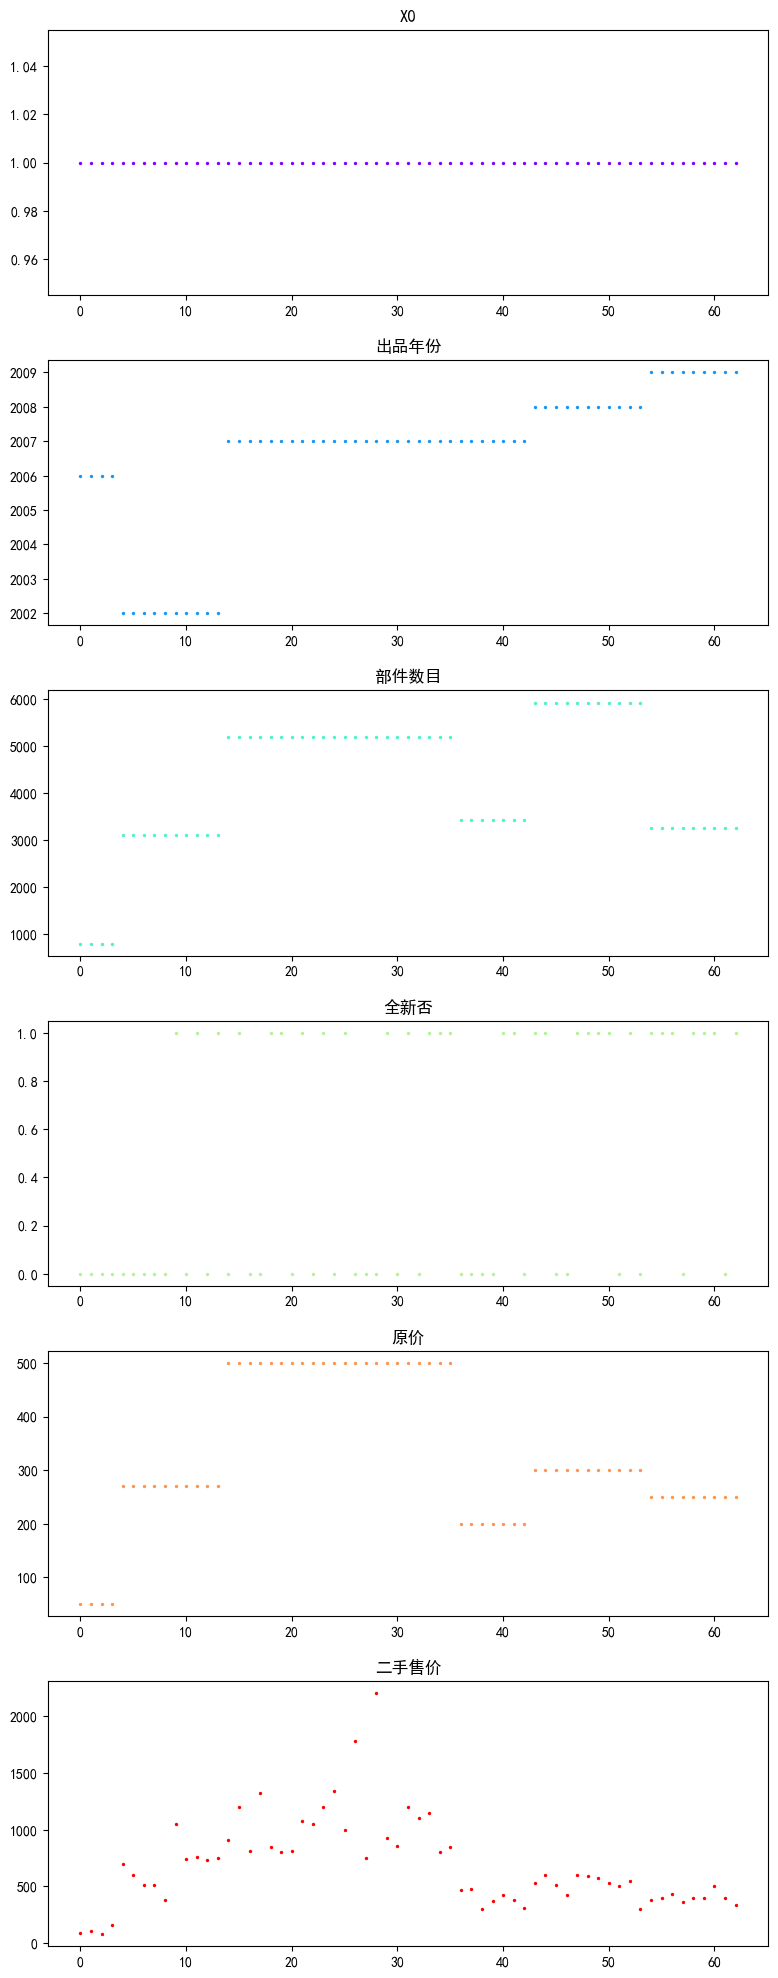

In [34]:
dataPlot(df)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

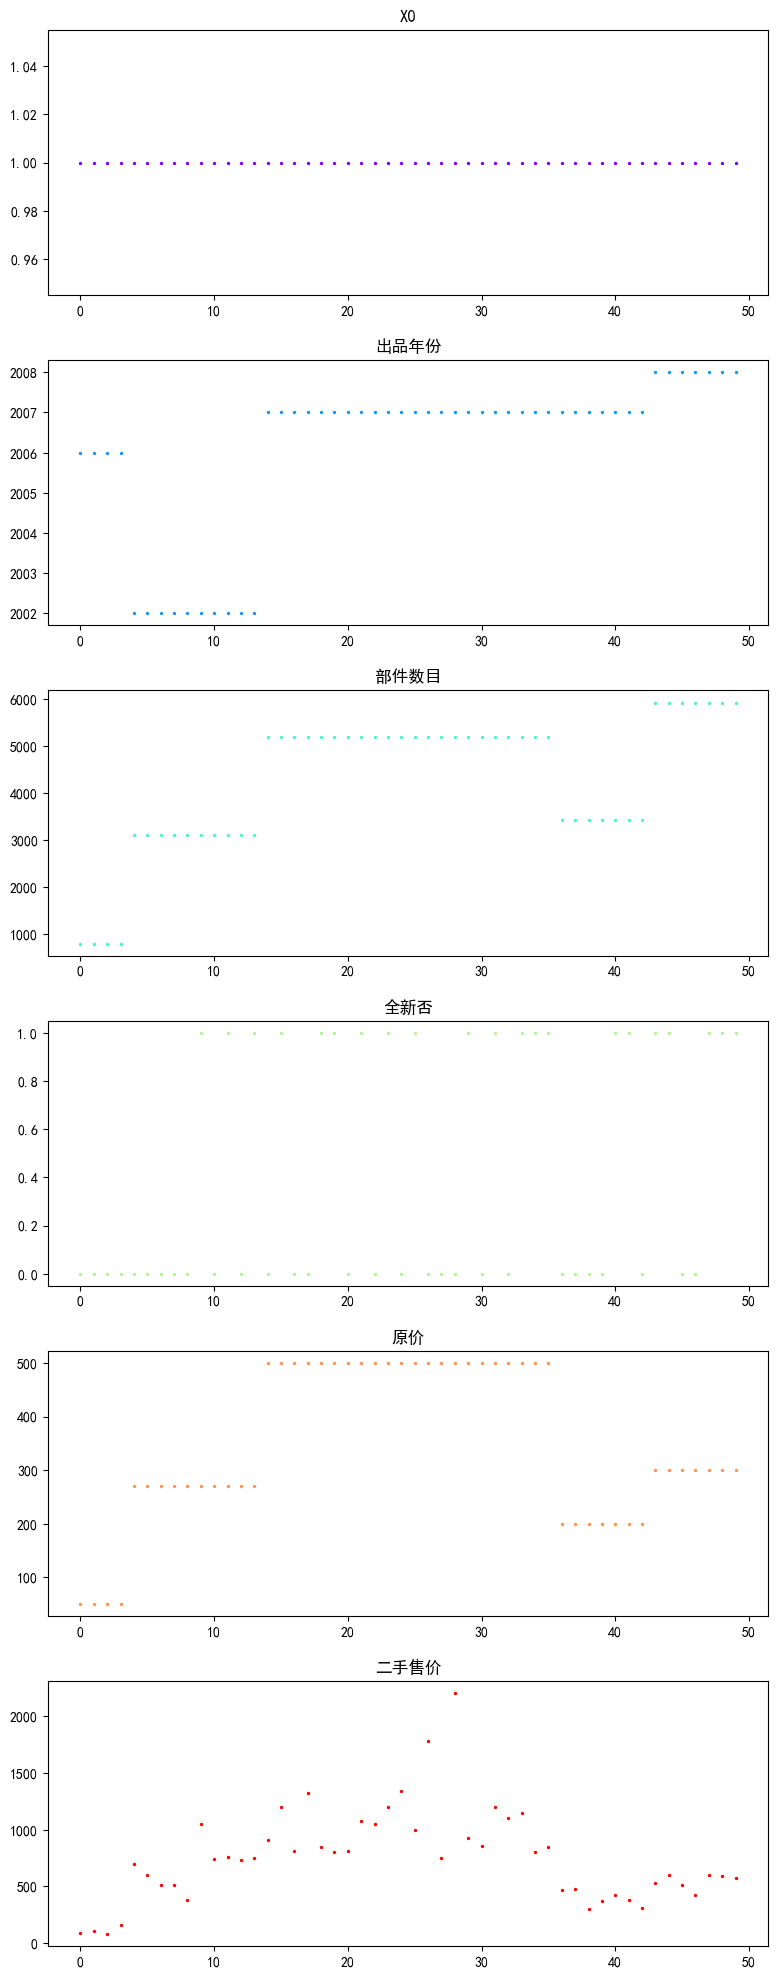

In [35]:
dataPlot(train)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

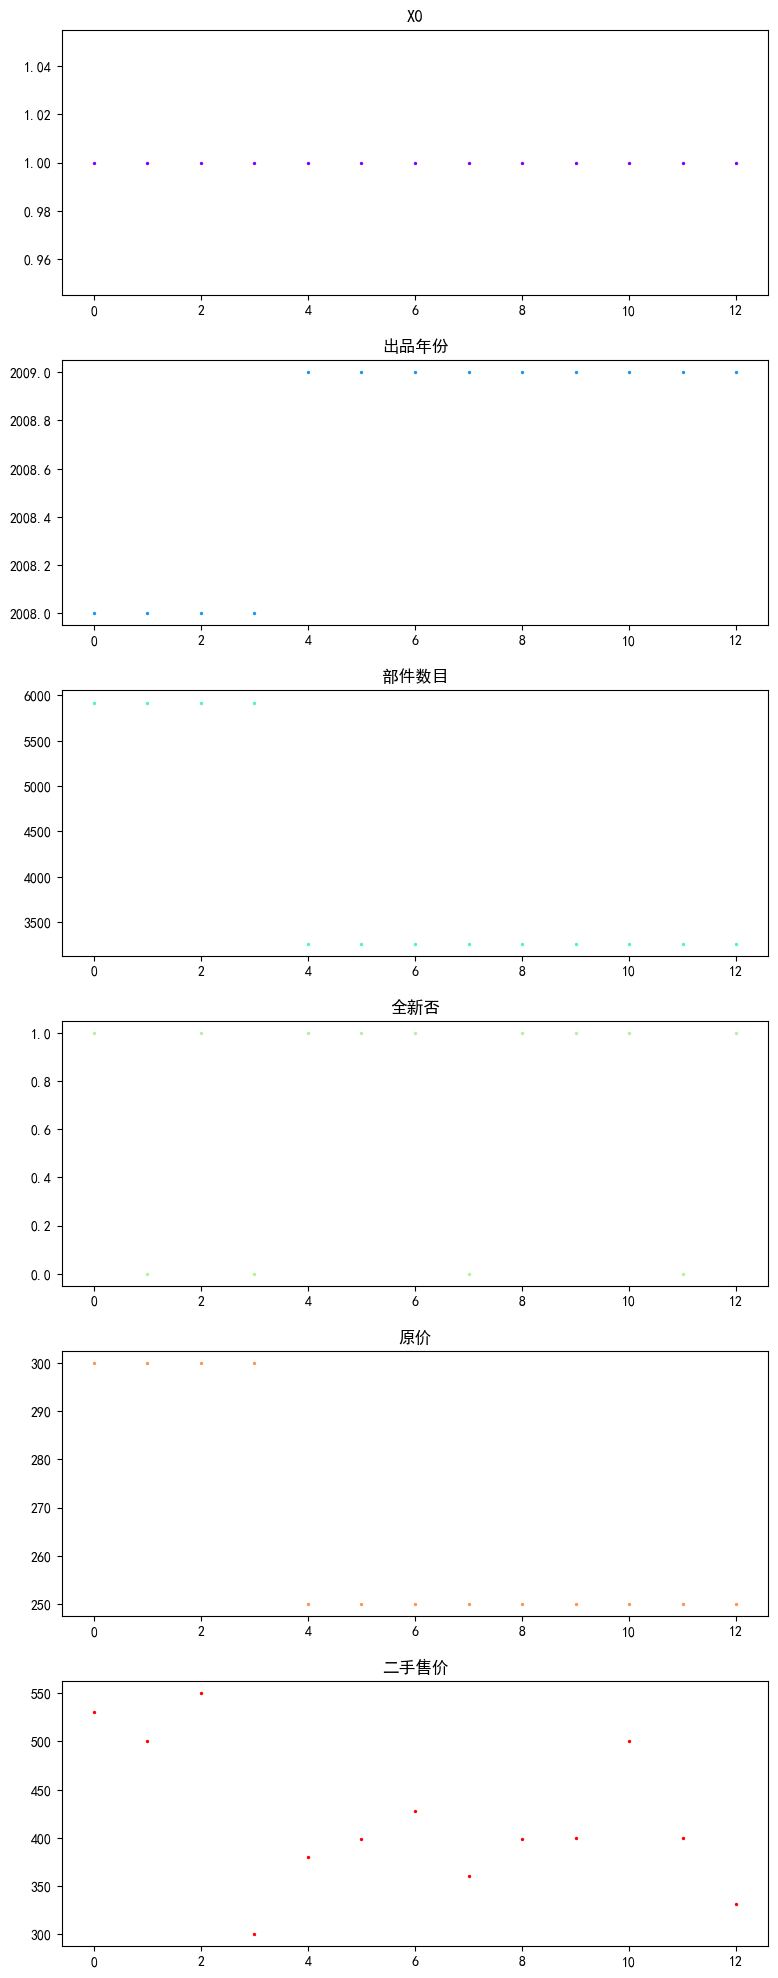

In [36]:
dataPlot(test)

In [37]:
def get_Mat(dataSet):
    xMat = np.mat(dataSet.iloc[:,:-1].values)
    yMat = np.mat(dataSet.iloc[:,-1].values).T
    return xMat,yMat

In [38]:
def standRegres(dataSet):
    xMat,yMat =get_Mat(dataSet)
    xTx = xMat.T*xMat
    if np.linalg.det(xTx)==0:                
        print('矩阵为奇异矩阵，无法求逆')
        return
    ws=xTx.I*(xMat.T*yMat)
    return ws

In [39]:
ws = standRegres(df)

In [40]:
ws

matrix([[ 5.52543389e+04],
        [-2.75598885e+01],
        [-2.66942021e-02],
        [-1.22918160e+01],
        [ 2.57381729e+00]])

In [41]:
xMat,yMat = get_Mat(df)

In [42]:
yHat = xMat * ws

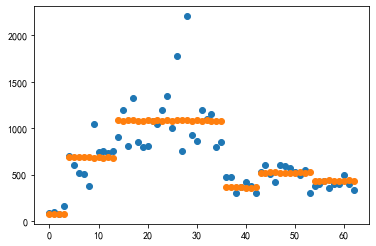

In [43]:
#画出真实值和预测值的散点图
plt.scatter(range(df.shape[0]),yMat.A)
plt.scatter(range(df.shape[0]),yHat.A)

In [44]:
df.head()

,X0,出品年份,部件数目,全新否,原价,二手售价
0,1,2006,800,0,49.99,85.00
1,1,2006,800,0,49.99,102.50
2,1,2006,800,0,49.99,77.00
3,1,2006,800,0,49.99,162.50
4,1,2002,3096,0,269.99,699.99


In [45]:
df = df.drop(labels='X0',axis=1)

In [46]:
df.head()

,出品年份,部件数目,全新否,原价,二手售价
0,2006,800,0,49.99,85.00
1,2006,800,0,49.99,102.50
2,2006,800,0,49.99,77.00
3,2006,800,0,49.99,162.50
4,2002,3096,0,269.99,699.99


#### lasso

In [53]:
from sklearn.linear_model import Lasso

In [54]:
las = Lasso(alpha=0.05)
las.fit(df.iloc[:,:-1],df.iloc[:,-1])

Lasso(alpha=0.05)

In [55]:
las.coef_

array([-2.75566048e+01, -2.67180496e-02, -1.20816591e+01,  2.57387787e+00])

#### sqlite

In [47]:
from sqlalchemy import create_engine

In [48]:
engin = create_engine('sqlite:///data.db')

In [49]:
df.to_sql('ligao',engin)

In [50]:
frame = pd.read_sql('ligao',engin)

In [52]:
frame.head()

,index,出品年份,部件数目,全新否,原价,二手售价
0,0,2006,800,0,49.99,85.00
1,1,2006,800,0,49.99,102.50
2,2,2006,800,0,49.99,77.00
3,3,2006,800,0,49.99,162.50
4,4,2002,3096,0,269.99,699.99
